# Feature Importance

In [3]:
import pandas as pd
from keystrokes.utils.model_utils import load_model
from keystrokes.utils.model_analysis_utils import calculate_shap_values
import matplotlib.pyplot as plt
TEST_SET_URL = "https://www.dropbox.com/s/wr7dk90rqqdfdda/test_data.csv?dl=1"
MODEL_URL = "https://www.dropbox.com/s/yiitiwjct2zxhfi/model.joblib?dl=1"

In [4]:
model = load_model(MODEL_URL)
df = pd.read_csv(TEST_SET_URL)
y = df['labels']
X = df.drop(columns='labels')

Model downloaded successfully.


In [5]:
feature_importance = calculate_shap_values(model, X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


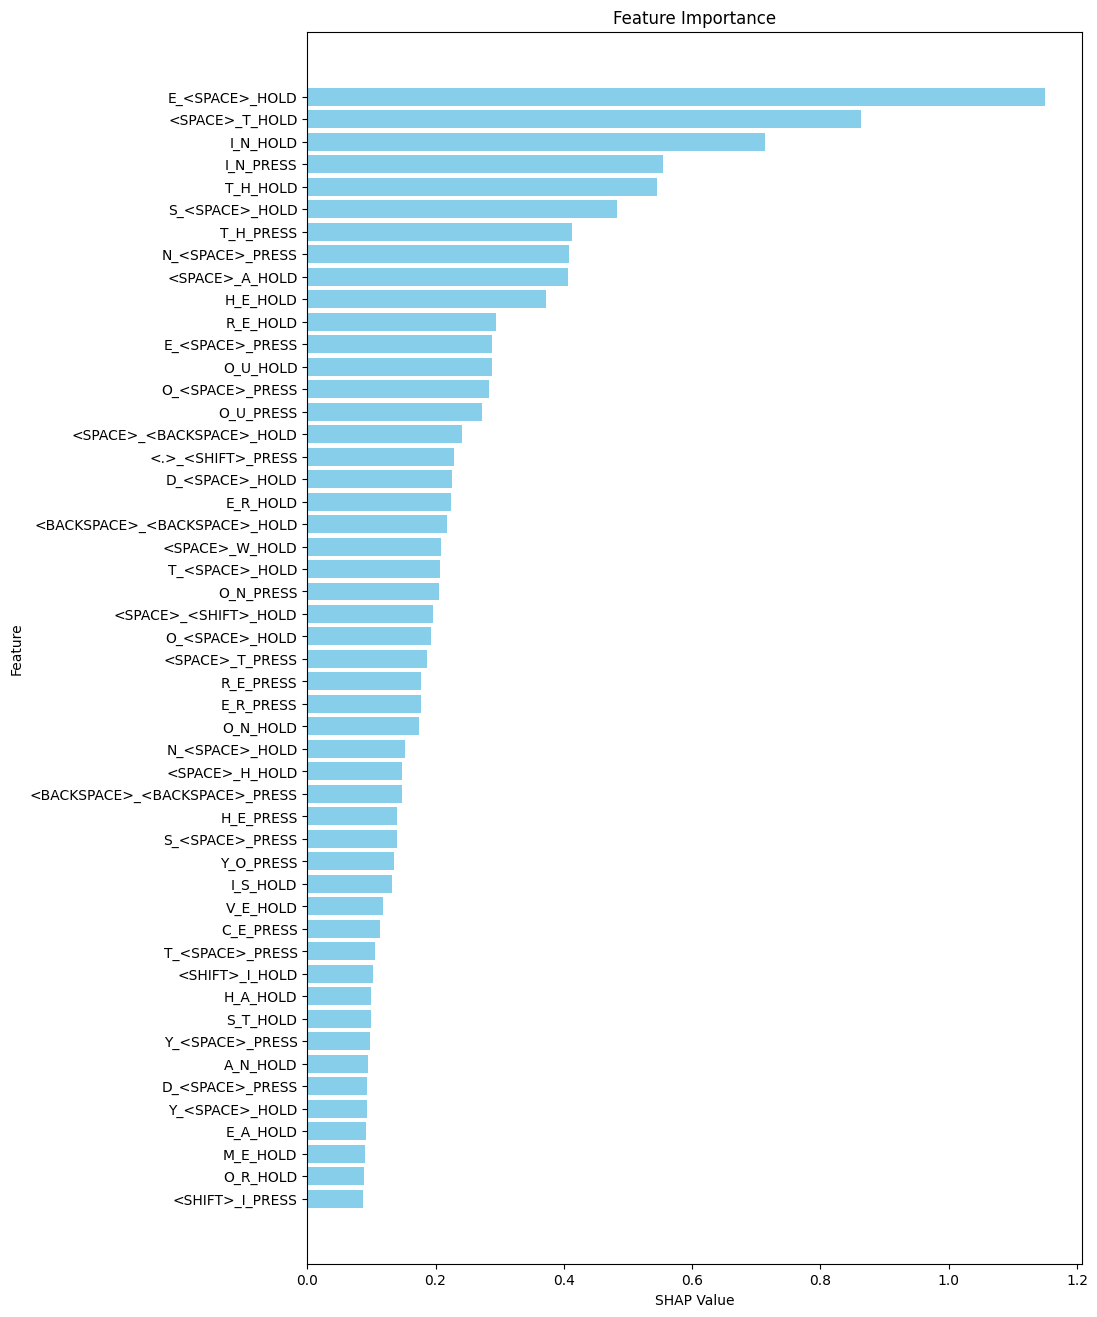

In [10]:


df = feature_importance[:50]
# Combine the first three columns into one column
df['feature'] = df['first_keycode'] + '_' + df['second_keycode'] + '_' + df['feature_type']

# Sort the dataframe by shap_value in descending order
df = df.sort_values(by='shap_value', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10,16))
plt.barh(df['feature'], df['shap_value'], color='skyblue')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()
